In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import networkx as nx
from pyvis.network import Network


In [2]:
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in xrange(0, len(l), n))

def swap1(paths):
    #paths = paths.tolist()
    path1index = random.randrange(len(paths))
    path2index = random.randrange(len(paths))
    
    while len(paths[path2index]) == 0 :
        path2index = random.randrange(len(paths))
    
    while path1index == path2index:
        path1index = random.randrange(len(paths))
    
    randP1 = math.ceil(random.random()*2)
    randP2 = math.ceil(random.random()*2)

    path1 = np.array(paths[path1index]).tolist()
    path2 = np.array(paths[path2index]).tolist()
    
    y1 = path2[0] if randP2 == 1 else path2[len(path2)-1]
    path1.insert(0,y1)
    path2.remove(y1)
    paths[path1index] = path1
    paths[path2index] = path2
    return paths

In [3]:
def swap2(paths):
    print("swap entrées intra")
    #paths = paths.tolist()
    path1index = random.randrange(len(paths))
    
    path1 = paths[path1index]
    
    while len(path1) < 2 :
        path1index = random.randrange(len(paths))
        path1 = paths[path1index]
        print("in while 1")
    
    
    rand1 = random.randrange(len(path1))
    
    rand2 = random.randrange(len(path1))
    
    print("randrange "+str(len(path1)))
    print("rand1 " + str(rand1))
    print("rand2 " + str(rand2))
    print(path1)
    
    while rand1 == rand2 :
        rand2 = random.randrange(len(path1))
        print("in while 2")
        print("regenerated rand2 "+ str(rand2))

    
    x1 = path1[rand1]
    x2 = path1[rand2]
    #same si 1 element
    
    path1[rand1] , path1[rand2] = path1[rand2] , path1[rand1]

    paths[path1index] = path1

    
    #print(path1)
    #print(path2)
    #print("swaped extra")
    return paths

In [4]:
def swap3(x):
    print("swap3")

In [5]:
def printError(x):
    print("random out of bound")

In [6]:
def switchAction(x):
    #print("x "+ str(x))
    switcher = {
        1:swap1,
        2:swap2,
        3:swap3
        
    }
    #print("xx "+ str(x))
    return switcher.get(x,printError)

In [7]:
def f(x, matrice):
    total_sum = 0
    for cycle in x :
        #print("cycle : "+ str(cycle))
        cycle_sum = 0
        if(len(cycle)>0) :
            for i in range(len(cycle)-1) :
                if i == 0 :
                    cycle_sum += matrice[cycle[i]][0]
                    #print("0 to node "+ str(cycle[i])+" : "+ str(matrice[cycle[i]][0]))
                else :
                    cycle_sum += matrice[cycle[i]][cycle[i-1]]
                    #print("node "+str(cycle[i-1])+" to node "+str(cycle[i])+" : "+str(matrice[cycle[i]][cycle[i-1]]))

            #print("node "+ str(cycle[len(cycle)-1])+" to 0 : "+ str(matrice[cycle[len(cycle)-1]][0]))    
            cycle_sum += matrice[cycle[len(cycle)-1]][0]
            #print("cycle sum "+ str(cycle_sum))
            total_sum += cycle_sum
    #print("total sum "+str(total_sum))
    return total_sum

In [8]:
def g(x, matrice):
    total_sum = 0
    for cycle in x :
        cycle_sum = 0
        if(len(cycle)>0) :
            for i in range(len(cycle)-1) :
                if i == 0 :
                    cycle_sum += matrice[0][cycle[i]]
                    print("0 to node "+ str(cycle[i])+" : "+ str(matrice[0][cycle[i]]))
                else :
                    cycle_sum += matrice[cycle[i-1]][cycle[i]]
                    print("node "+str(cycle[i-1])+" to node "+str(cycle[i])+" : "+str(matrice[cycle[i-1]][cycle[i]]))


            cycle_sum += matrice[0][len(cycle)-1]
            print("cycle sum "+ str(cycle_sum))
            total_sum += cycle_sum
    print("total sum "+str(total_sum))
    return total_sum

In [9]:
def recuit2(matrice,k,t,n):

    fc = 500
    xstart = np.array_split(range(1,len(matrice),1),k)
    xc = np.array(xstart)
    print(xstart)
    print(xc)
    xc = xc.tolist()
    print(xc)
    
    na =0
    results = []
    allresults = []
    DeltaE_avg = 0.00000000001
    for i in range(n):
        randAction = random.randrange(1,3)
        swap = switchAction(1)
        xc = swap(xc)
        xi = xc
        totalCost = f(xi, matrice)
        DeltaE = abs(totalCost-fc)
        if (totalCost>fc):
            if(n==0) : DeltaE_avg = DeltaE
            # objective function is worse
            # generate probability of acceptance
            p = math.exp(-DeltaE/(DeltaE_avg * t))
            # determine whether to accept worse point
            if (random.random()<p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:
            # objective function is lower, automatically accept
            accept = True
        if (accept==True):
            # update currently accepted solution
            xc = xi
            fc = totalCost
            xopti = xc
            results.append(fc)
            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
        allresults.append(totalCost)
        t = 0.95*t

    plt.subplot(121)
    plt.plot(range(len(results)),results)
    print(fc)
    print(xopti)
    plt.show()

[array([1, 2, 3]), array([4, 5])]
[array([1, 2, 3]) array([4, 5])]
[array([1, 2, 3]), array([4, 5])]
96
[[5], [4, 3, 1, 2]]


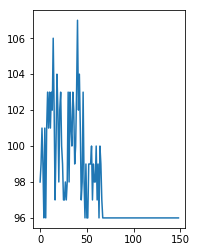

fin


In [10]:
matrice = [
        [1,2,3,4,5,6],
        [7,8,9,10,11,12],
        [13,14,15,16,17,18],
        [19,20,21,22,23,24],
        [25,26,27,28,29,30],
        [31,32,33,34,35,36]
        
    ]

recuit2(matrice,2,10,1000)

print("fin")

In [11]:
myGraph4 = nx.Graph()
matrice = [
[0,21,2,51],
[31,0,3,2],
[2,3,0,2],
[41,2,2,0]
]

for i in range(len(matrice)):
    myGraph4.add_node(i)

for i in range(len(matrice)) :
    for j in range(len(matrice)) :
        if(i>j) :
            print(matrice[i][j])
            myGraph4.add_edge(i,j,weight=matrice[i][j])

    
g4 = Network(height=700, width=700, notebook= True)
g4.toggle_hide_edges_on_drag(False)
g4.barnes_hut()
g4.from_nx(myGraph4)
g4.show("ex5.html")


31
2
3
41
2
2


[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
[array([1, 2, 3, 4, 5]) array([6, 7, 8, 9])]
[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
13
[[4, 2, 6, 7, 5, 9, 3], [8, 1]]


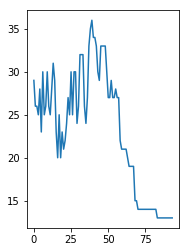

In [12]:
matrice2 = [
    [0,1,6,5,2,2,3,4,1,5],
    [1,0,3,4,1,2,4,2,1,3],
    [6,3,0,1,2,5,3,9,6,4],
    [5,4,1,0,7,3,1,5,2,7],
    [2,1,2,7,0,5,7,1,1,3],
    [2,2,5,3,5,0,6,3,2,6],
    [3,4,3,1,7,6,0,1,7,5],
    [4,2,9,6,1,3,1,0,2,3],
    [1,1,6,2,1,2,7,2,0,2],
    [5,3,4,7,3,6,5,3,2,0]
]

recuit2(matrice2,2,5,1000000)

[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
[array([1, 2, 3, 4, 5]) array([6, 7, 8, 9])]
[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
44
[[9], [2, 8, 4, 5, 3, 1, 7, 6]]


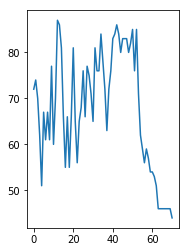

In [13]:
matrice3 = [
    [0,11,12,13,14,15,16,17,18,19],
    [11,0,3,4,1,2,4,2,1,3],
    [12,3,0,1,2,5,3,9,6,4],
    [13,4,1,0,7,3,1,5,2,7],
    [14,1,2,7,0,5,7,1,1,3],
    [15,2,5,3,5,0,6,3,2,6],
    [16,4,3,1,7,6,0,1,7,5],
    [17,2,9,6,1,3,1,0,2,3],
    [18,1,6,2,1,2,7,2,0,2],
    [19,3,4,7,3,6,5,3,2,0]
]

recuit2(matrice3,2,10,1000)

In [14]:
def matriceToGraph(matrice):
    myGraph4 = nx.Graph()

    for i in range(len(matrice)):
        myGraph4.add_node(i)

    for i in range(len(matrice)) :
        for j in range(len(matrice)) :
            if(i>j) :
                #print(matrice[i][j])
                myGraph4.add_edge(i,j,weight=matrice[i][j])

    return myGraph4

In [119]:
def recuit3(matrice,k,t,n):
    paths = []
    fc = 500
    xstart = np.array_split(range(1,len(matrice),1),k)
    xc = np.array(xstart)
    print(xstart)
    print(xc)
    xc = xc.tolist()
    print(xc)
    
    na =0
    results = []
    allresults = []
    DeltaE_avg = 0.00000000001
    for i in range(n):
        randAction = random.randrange(1,3)
        swap = switchAction(1)
        xc = swap(xc)
        xi = xc
        totalCost = f(xi, matrice)
        DeltaE = abs(totalCost-fc)
        if (totalCost>fc):
            if(n==0) : DeltaE_avg = DeltaE
            # objective function is worse
            # generate probability of acceptance
            p = math.exp(-DeltaE/(DeltaE_avg * t))
            # determine whether to accept worse point
            if (random.random()<p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:
            # objective function is lower, automatically accept
            accept = True
        if (accept==True):
            # update currently accepted solution
            xc = xi
            fc = totalCost
            xopti = xc.copy()
            xopti2 = []#xopti.copy()
            print("xopti "+ str(xopti))
            
            
            for path in xopti :
                path2 = path.copy()
                print("path" +str(path))
                print("path2"+ str(path2))
                print("ajoute 0 début et fin")
                path2.insert(0,0)
                path2.insert(len(path2),0)
                print("path"+ str(path))
                print("path2" + str(path2))
                xopti2.append(path2)
            
            paths.append(xopti2)
            #paths.append(xopti2)
            
            results.append(fc)
            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
        allresults.append(totalCost)
        t = 0.95*t

    print(fc)
    print(xopti)
   
    return paths

In [120]:
def convertPaths(paths):
    newPaths = []
    for path in paths:
        newPath = []
        for cycle in path:
            cycle2 = []
            for node in cycle :
                cycle2.append(str(node))
            newPath.append(cycle2)
        #print("new path"+ str(newPath))
        newPaths.append(newPath)
    return newPaths

<IPython.core.display.Javascript object>


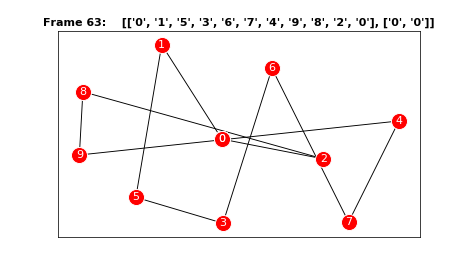

In [126]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import matplotlib.animation
%matplotlib notebook

fig, ax = plt.subplots(figsize=(7,4))

def update(num):
    

    print("fig "+str(fig))
    print("ax"+ str(ax))
    ax.clear()
    i = num // 3
    j = num % 3 + 1
    
    #cycles = paths[donePathNumber]
    
    
    newPaths = convertPaths(paths)
    cycles = newPaths[num]
    print(cycles)

    for path in cycles :
        # Query nodes
        print("path "+ str(path))
        query_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=path, ax=ax)
        query_nodes.set_edgecolor("white")
        nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(path,path)),  font_color="white", ax=ax)
        edgelist = [path[k:k+2] for k in range(len(path) - 1)]
        print("edge list" +str(edgelist))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edgelist, ax=ax)

        # Scale plot ax
    ax.set_title("Frame %d:    "%(num+1) + str(cycles), fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])

#test(1)


In [127]:

paths = [
    [0,1,2,3,4,5,6,7],
    [0,1,2,3,4,5]
]    

paths = [
    [[0,1,2,3,4,0],[0,5,6,7,0]],
    [[0,1,2,0],[0,3,4,5,0]] 
]
    
print("paths avant "+ str(paths))
    
paths = recuit3(matrice3,2,10,1000)

#paths = result[0]

print("paths après "+ str(paths))
#def plotGraph(paths):

# Create Graph
#G = nx.cubical_graph()
G = matriceToGraph(matrice3)


labels2 = {}
for i in G.nodes():
    labels2[i]= str(i)
G = nx.relabel_nodes(G, labels2)
pos = nx.spring_layout(G)
#fig, ax = plt.subplots(figsize=(7,4))
#fig2 = plt.figure()

#ax = fig2.add_subplot(1,1,1)

#update(1)

ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(paths), interval=100, repeat=False)
plt.show()
#plotGraph(paths)

paths avant [[[0, 1, 2, 3, 4, 0], [0, 5, 6, 7, 0]], [[0, 1, 2, 0], [0, 3, 4, 5, 0]]]
[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
[array([1, 2, 3, 4, 5]) array([6, 7, 8, 9])]
[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
xopti [[6, 1, 2, 3, 4, 5], [7, 8, 9]]
path[6, 1, 2, 3, 4, 5]
path2[6, 1, 2, 3, 4, 5]
ajoute 0 début et fin
path[6, 1, 2, 3, 4, 5]
path2[0, 6, 1, 2, 3, 4, 5, 0]
path[7, 8, 9]
path2[7, 8, 9]
ajoute 0 début et fin
path[7, 8, 9]
path2[0, 7, 8, 9, 0]
xopti [[1, 2, 3, 4, 5], [6, 7, 8, 9]]
path[1, 2, 3, 4, 5]
path2[1, 2, 3, 4, 5]
ajoute 0 début et fin
path[1, 2, 3, 4, 5]
path2[0, 1, 2, 3, 4, 5, 0]
path[6, 7, 8, 9]
path2[6, 7, 8, 9]
ajoute 0 début et fin
path[6, 7, 8, 9]
path2[0, 6, 7, 8, 9, 0]
xopti [[9, 1, 2, 3, 4, 5], [6, 7, 8]]
path[9, 1, 2, 3, 4, 5]
path2[9, 1, 2, 3, 4, 5]
ajoute 0 début et fin
path[9, 1, 2, 3, 4, 5]
path2[0, 9, 1, 2, 3, 4, 5, 0]
path[6, 7, 8]
path2[6, 7, 8]
ajoute 0 début et fin
path[6, 7, 8]
path2[0, 6, 7, 8, 0]
xopti [[6, 9, 1, 2, 3, 4, 5], [7, 8]]
pa

In [105]:
print(range(0,len([5,4,5,6,7])-1))

range(0, 4)
